In [1]:
from pymeasure import instruments, adapters
import pyvisa as visa
from lockin import LockInAmplifier, Lister

# ============================
import asyncio
import numpy as np
from ipywidgets import Button
import matplotlib.pyplot as plt
import plotly.graph_objs as go


d:\Git-Project\odmactor\zhy


In [6]:

%timeit
N = 1000
lockin = LockInAmplifier(N)

Lock-in Amplifier is found on GPIB0::23::INSTR: Stanford_Research_Systems,SR830,s/n35577,ver1.03


In [8]:
%timeit
a = [lockin.magnitude for _ in range(1000)]

In [5]:

# create a figure widget and a plot
fig_trace = go.FigureWidget()
# fig_trace.add_scatter(x=trace.getIndex(), y=trace.getData()[0])
fig_trace.add_scatter(x=list(range(N)), y=lockin.get_data_with_time())
l = Lister(N)
# fig_trace.add_scatter(x=list(range(N)), y=l.new())


async def update_trace():
    """Update the plot every 0.1 s"""
    while True:
        # fig_trace.data[0].y = trace.getData()[0]
        fig_trace.data[0].y = lockin.get_data_with_time()
        # fig_trace.data[0].y = l.new()
        

        await asyncio.sleep(0.1)


# If this cell is re-excecuted and there was a previous task, stop it first to avoid a dead daemon
try:
    task_trace.cancel()
except:
    pass

loop = asyncio.get_event_loop()
task_trace = loop.create_task(update_trace())
# loop.run_until_complete(update_trace())

# # create a stop button
button_trace_stop = Button(description='stop')
button_trace_stop.on_click(lambda a: task_trace.cancel())

display(fig_trace, button_trace_stop)


FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '340eb5d1-eca2-4d0d-a457-6681dd597959',
 …

Button(description='stop', style=ButtonStyle())

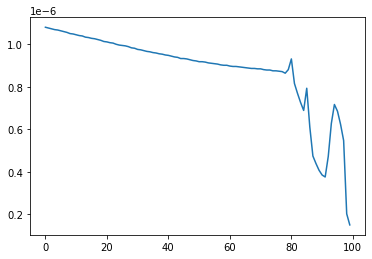

In [27]:
plt.plot(lockin.get_data_with_time())

In [1]:
from pymeasure import instruments
lockin = instruments.srs.SR830('GPIB0::23::INSTR')

In [15]:
lockin.magnitude

9.49954e-08

In [55]:
d = lockin.get_buffer(end=100)
lockin.clear

In [16]:
np.mean(lockin.get_data_with_time())

3.3967380319999994e-07

In [59]:
lockin.get_buffer(end=10)

array([ 9.6858003e-08,  8.1956841e-08,  1.0989652e-07, -8.5682132e-08,
       -2.6077214e-07, -8.1956841e-08,  1.1734710e-07,  2.0489188e-07,
        9.1270067e-08, -6.5193035e-08], dtype=float32)

In [59]:
d.shape
import matplotlib.pyplot as plt

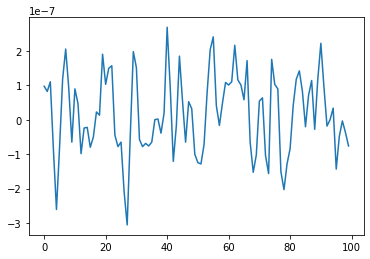

KeyboardInterrupt: 

In [63]:
fig, ax = plt.subplots()
# The time vector is fixed. No need to read it on every iteration.
N = 100
line, = ax.plot(lockin.get_buffer(end=N))



while True:

    plt.pause(0.1)

while True:
    line.set_ydata(lockin.get_buffer(end=N))

    # ax.set_ylim(np.min(y), np.max(y))
    plt.pause(0.1)


In [1]:
import TimeTagger as tt

In [28]:
tagger = tt.createTimeTagger()
tagger.setTestSignal(7, True)

conf = {
    'binwidth': 100000000,
    'n_values':100,
    'channels':[7]
}
# counter = tt.Counter(tagger, channels=[7], n_values=100, binwidth=1000)
counter = tt.Counter(tagger, **conf)


In [29]:
tagger.setTestSignal([7], True)

counter.start()
print(counter.getData())


[[86 85 85 85 86 85 85 85 86 85 85 85 86 85 85 86 85 85 85 85 86 85 85 86
  85 85 85 86 85 85 85 86 85 85 85 86 85 85 85 86 85 85 85 86 85 85 85 86
  85 85 85 86 85 85 85 86 85 85 85 85 86 85 85 85 86 85 85 85 86 85 85 85
  86 85 85 85 86 85 85 85 86 85 85 85 86 85 85 85 86 85 85 85 86 85 85 85
  85 86 85 85]]


In [31]:
tt.freeTimeTagger(tagger)
tt.scanTimeTagger()

('1740000JG0',)

In [69]:
import numpy as np
for i in range(3):
    np.savetxt('{}.txt'.format(i), lockin.get_data_with_time())

In [9]:
import pyvisa

In [10]:
rm=pyvisa.ResourceManager()
rm.list_resources()

('USB0::0x0AAD::0x0054::104174::INSTR', 'ASRL3::INSTR', 'GPIB0::23::INSTR')

In [1]:
import nidaqmx

# -0.07476920729381246
# >>> with nidaqmx.Task() as task:
# ...     task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
# ...     task.read(number_of_samples_per_channel=2)
# ...
# [0.26001373311970705, 0.37796597238117036]
# >>> from nidaqmx.constants import LineGrouping
# >>> with nidaqmx.Task() as task:
# ...     task.di_channels.add_di_chan(
# ...         "cDAQ2Mod4/port0/line0:1", line_grouping=LineGrouping.CHAN_PER_LINE)
# ...     task.read(number_of_samples_per_channel=2)
# ...
# [[False, True], [True, True]]

In [6]:
with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
    
    task.read(number_of_samples_per_channel=100)


In [4]:
task.read()

DaqError: Task specified is invalid or does not exist.
Status Code: -200088